In [1]:
from src.utils import read_jsonl
from src.preprocessing import make_dataset
from sklearn.metrics import classification_report, matthews_corrcoef, confusion_matrix, ConfusionMatrixDisplay
import json
import pandas as pd
from datasets import load_dataset

c:\Users\subje\anaconda3\envs\irony-detection\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [187]:
results = read_jsonl('results/clm_random_closed_zs.jsonl')

with open('src/prompts/double_phrases.json', 'r') as f:
    text = f.read()
phrases = json.loads(text)

In [14]:
results = read_jsonl('results/tweeteval_random_closed_zs.jsonl')

with open('src/prompts/single_phrases.json', 'r') as f:
    text = f.read()
phrases = json.loads(text)

In [ ]:
results_new = []
for result in results:
    results_new.extend(result)
results = results_new

## Eval prompts

In [6]:
def eval_2(subs, results):
    golds, preds = [], []
    for res in results:
        if all(key in res['subs'] for key in subs.keys()) and len([(k,v) for k, v in subs.items() if res['seed_phs'][k] == v]) == len(subs.items()):
            golds.append(res['gold'])
            preds.append(res['pred'])
    return golds, preds

In [17]:
tab = []

for l, w in {k:len(v) for k, v in phrases.items()}.items():
    for i in range(0, w):
        golds, preds = eval_2({l:i}, results)
        outputs = classification_report(golds, preds, output_dict=True)
        outputs['mcc'] = matthews_corrcoef(golds, preds)

        line = {'name':f'{l} {i}'}
        for k, v in outputs.items():
            if isinstance(v, dict):
                for kk, vv in v.items():
                    line[f'{k}-{kk}'] = round(vv, 4)
            else:
                line[k] =  round(v, 4)
        tab.append(line)

In [18]:
pd.DataFrame(tab)

,name,0-precision,0-recall,0-f1-score,0-support,1-precision,1-recall,1-f1-score,1-support,accuracy,macro avg-precision,macro avg-recall,macro avg-f1-score,macro avg-support,weighted avg-precision,weighted avg-recall,weighted avg-f1-score,weighted avg-support,mcc
0,labels 0,0.5628,0.4608,0.5067,3928.0,0.5193,0.6194,0.5649,3694.0,0.5377,0.5411,0.5401,0.5358,7622.0,0.5417,0.5377,0.5349,7622.0,0.0811
1,labels 1,0.5474,0.4581,0.4988,3973.0,0.5091,0.5974,0.5497,3738.0,0.5256,0.5282,0.5277,0.5242,7711.0,0.5288,0.5256,0.5235,7711.0,0.0560
2,labels 2,0.5614,0.0611,0.1102,4044.0,0.4750,0.9468,0.6326,3628.0,0.4799,0.5182,0.5039,0.3714,7672.0,0.5205,0.4799,0.3572,7672.0,0.0169
3,system 0,0.5635,0.4714,0.5134,3933.0,0.5272,0.6175,0.5688,3754.0,0.5427,0.5454,0.5444,0.5411,7687.0,0.5458,0.5427,0.5404,7687.0,0.0898
4,system 1,0.5467,0.3428,0.4213,3997.0,0.4939,0.6930,0.5768,3700.0,0.5111,0.5203,0.5179,0.4991,7697.0,0.5213,0.5111,0.4961,7697.0,0.0381
5,system 2,0.5511,0.1626,0.2512,4015.0,0.4776,0.8525,0.6122,3606.0,0.4890,0.5143,0.5076,0.4317,7621.0,0.5163,0.4890,0.4220,7621.0,0.0208
6,user 0,0.5554,0.3246,0.4097,11945.0,0.4965,0.7193,0.5875,11060.0,0.5144,0.5259,0.5220,0.4986,23005.0,0.5271,0.5144,0.4952,23005.0,0.0477
7,assistant 0,0.5540,0.2672,0.3606,5987.0,0.4911,0.7668,0.5987,5522.0,0.5069,0.5226,0.5170,0.4797,11509.0,0.5238,0.5069,0.4748,11509.0,0.0392
8,assistant 1,0.5563,0.3822,0.4531,5958.0,0.5028,0.6721,0.5752,5538.0,0.5218,0.5295,0.5271,0.5142,11496.0,0.5305,0.5218,0.5119,11496.0,0.0566
9,intro 0,0.5490,0.3256,0.4088,3096.0,0.4884,0.7065,0.5775,2821.0,0.5072,0.5187,0.5160,0.4931,5917.0,0.5201,0.5072,0.4892,5917.0,0.0346


## Eval autres

In [45]:
DATASET_NAME = "CreativeLang/EPIC_Irony"

In [85]:
df = make_dataset(pd.DataFrame(load_dataset(DATASET_NAME)['train']))
results_df = [{'id_original':result['id_original'], 'gold':result['gold'], 'pred':result['pred']} for result in results]

In [94]:
res = pd.merge(pd.DataFrame(results_df), df, how='left', on='id_original')

In [92]:
outputs = classification_report(res.gold, res.pred, output_dict=True)
outputs['mcc'] = matthews_corrcoef(res.gold, res.pred)
outputs

{'0': {'precision': 0.8243243243243243,
  'recall': 0.14400377714825308,
  'f1-score': 0.24517684887459806,
  'support': 2118.0},
 '1': {'precision': 0.24363788068418857,
  'recall': 0.8998459167950693,
  'f1-score': 0.3834537097833224,
  'support': 649.0},
 'accuracy': 0.32128659197687026,
 'macro avg': {'precision': 0.5339811025042565,
  'recall': 0.5219248469716612,
  'f1-score': 0.3143152793289602,
  'support': 2767.0},
 'weighted avg': {'precision': 0.6881242874893233,
  'recall': 0.32128659197687026,
  'f1-score': 0.2776096940967745,
  'support': 2767.0},
 'mcc': 0.054590492664351585}

### By source

In [97]:
res_reddit = res.query('source=="reddit"')
res_twitter = res.query('source=="twitter"')

In [100]:
outputs = classification_report(res_reddit.gold, res_reddit.pred, output_dict=True)
outputs['mcc'] = matthews_corrcoef(res_reddit.gold, res_reddit.pred)
outputs

{'0': {'precision': 0.7212121212121212,
  'recall': 0.12632696390658174,
  'f1-score': 0.21499548328816623,
  'support': 942.0},
 '1': {'precision': 0.31927212572373864,
  'recall': 0.8935185185185185,
  'f1-score': 0.4704448507007922,
  'support': 432.0},
 'accuracy': 0.3675400291120815,
 'macro avg': {'precision': 0.52024212346793,
  'recall': 0.5099227412125501,
  'f1-score': 0.3427201669944792,
  'support': 1374.0},
 'weighted avg': {'precision': 0.5948379741590053,
  'recall': 0.3675400291120815,
  'f1-score': 0.2953114416013063,
  'support': 1374.0},
 'mcc': 0.028344830411541105}

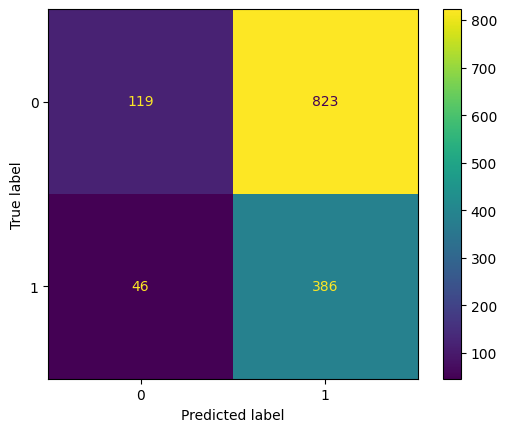

In [104]:
ConfusionMatrixDisplay(confusion_matrix(res_reddit.gold, res_reddit.pred)).plot()

In [121]:
print(confusion_matrix(res_reddit.gold, res_reddit.pred)[0][0]+confusion_matrix(res_reddit.gold, res_reddit.pred)[1][1]) #True
print(confusion_matrix(res_reddit.gold, res_reddit.pred)[1][0]+confusion_matrix(res_reddit.gold, res_reddit.pred)[0][1]) #False

505
869


In [101]:
outputs = classification_report(res_twitter.gold, res_twitter.pred, output_dict=True)
outputs['mcc'] = matthews_corrcoef(res_twitter.gold, res_twitter.pred)
outputs

{'0': {'precision': 0.9073170731707317,
  'recall': 0.15816326530612246,
  'f1-score': 0.26937002172338886,
  'support': 1176.0},
 '1': {'precision': 0.16666666666666666,
  'recall': 0.9124423963133641,
  'f1-score': 0.28185053380782915,
  'support': 217.0},
 'accuracy': 0.2756640344580043,
 'macro avg': {'precision': 0.5369918699186992,
  'recall': 0.5353028308097433,
  'f1-score': 0.275610277765609,
  'support': 1393.0},
 'weighted avg': {'precision': 0.7919393716550231,
  'recall': 0.2756640344580043,
  'f1-score': 0.27131422209835193,
  'support': 1393.0},
 'mcc': 0.0722749673144407}

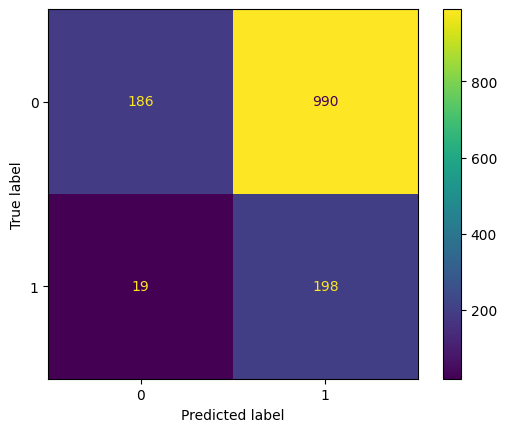

In [105]:
ConfusionMatrixDisplay(confusion_matrix(res_twitter.gold, res_twitter.pred)).plot()

In [120]:
print(confusion_matrix(res_twitter.gold, res_twitter.pred)[0][0]+confusion_matrix(res_twitter.gold, res_twitter.pred)[1][1]) #True
print(confusion_matrix(res_twitter.gold, res_twitter.pred)[1][0]+confusion_matrix(res_twitter.gold, res_twitter.pred)[0][1]) #False

384
1009


### By sequence length

In [131]:
res['seq_len'] = res.apply(lambda x: len(x.parent_text)+len(text), axis=1)

In [153]:
seq_len_descr = res.seq_len.describe()

def jej(l):
    if l >= seq_len_descr['min'] and l<seq_len_descr['25%']:
        return 'min-25'
    elif l >= seq_len_descr['25%'] and l<seq_len_descr['50%']:
        return '25-50'
    elif l >= seq_len_descr['50%'] and l<seq_len_descr['75%']:
        return '50-75'
    else:
        return '75-max'

In [155]:
res['cat_seq_len'] = res.seq_len.apply(lambda x: jej(x))

In [168]:
for value in res.cat_seq_len.unique():
    res_eval = res.query(f'cat_seq_len=="{value}"')
    outputs = classification_report(res_eval.gold, res_eval.pred, output_dict=True)
    outputs['mcc'] = matthews_corrcoef(res_eval.gold, res_eval.pred)
    # print(outputs)

    # ConfusionMatrixDisplay(confusion_matrix(res_eval.gold, res_eval.pred)).plot()

    print('\nNumber of true values for ', value, ':', confusion_matrix(res_eval.gold, res_eval.pred)[0][0]+confusion_matrix(res_eval.gold, res_eval.pred)[1][1]) #True
    print('Number of false values for ', value, ':', confusion_matrix(res_eval.gold, res_eval.pred)[1][0]+confusion_matrix(res_eval.gold, res_eval.pred)[0][1], '\n') #False


Number of true values for  50-75 : 195
Number of false values for  50-75 : 500 


Number of true values for  25-50 : 240
Number of false values for  25-50 : 450 


Number of true values for  75-max : 183
Number of false values for  75-max : 509 


Number of true values for  min-25 : 271
Number of false values for  min-25 : 419 

